<a href="https://colab.research.google.com/github/Diwakar-Gupta/LrcDataScience/blob/main/22-02-15-KMeans/k_mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro

https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs

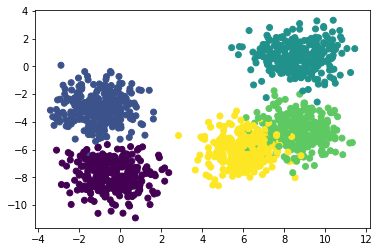

In [8]:
X, y = make_blobs(centers = 5, n_samples = 1500)
plt.scatter(X[:, 0], X[:, 1], c = y)

In [14]:
from sklearn.cluster import KMeans

km = KMeans()

km.fit(X)
y_pred = km.predict(X)

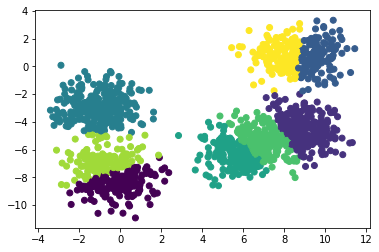

In [15]:
plt.scatter(X[:, 0], X[:, 1], c = y_pred)

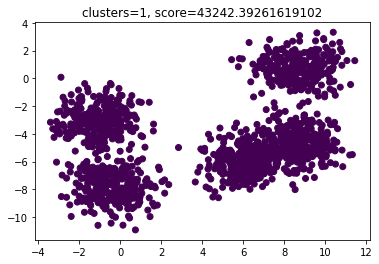

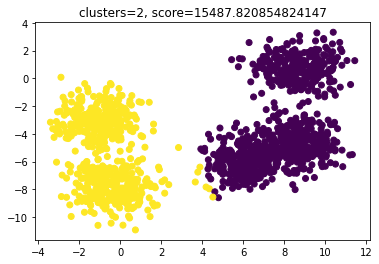

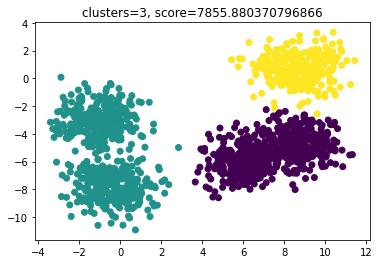

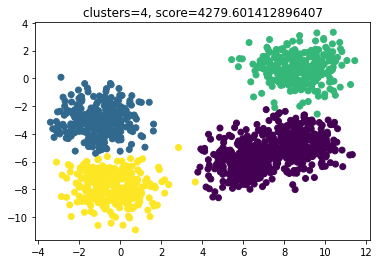

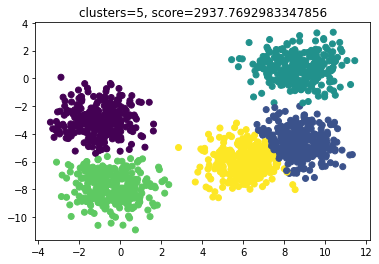

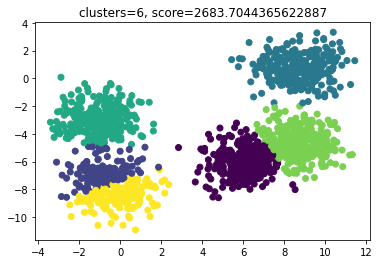

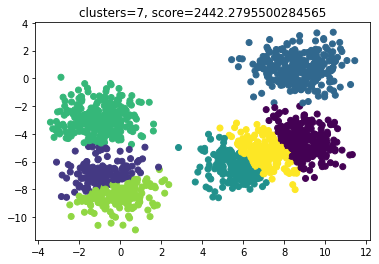

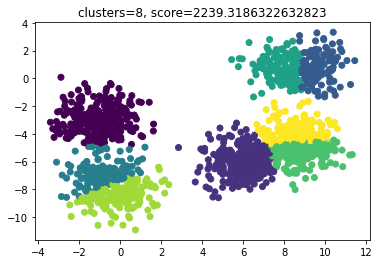

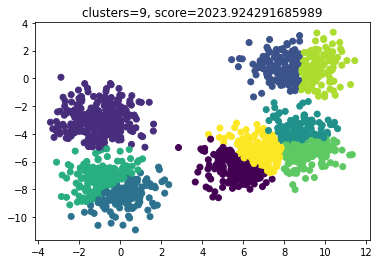

In [20]:

error = []
for i in range(1, 10):
    km = KMeans(n_clusters = i)
    km.fit(X)
    y_pred = km.predict(X)
    plt.scatter(X[:, 0], X[:, 1], c = y_pred)
    error.append(km.inertia_)
    plt.title('clusters={}, score={}'.format(i, km.inertia_))
    plt.show()

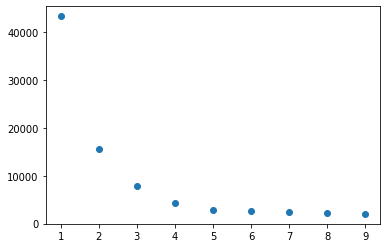

In [21]:
plt.scatter(np.arange(1, 10), error)
plt.show()

# Fail Case

In [22]:
from sklearn.datasets import make_moons

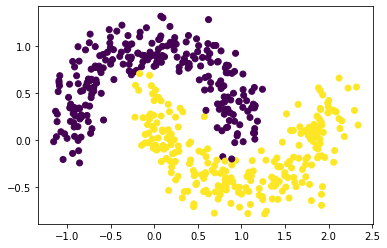

In [27]:
X, y =make_moons(noise = 0.15, n_samples = 500)
plt.scatter(X[:, 0], X[:, 1], c = y)

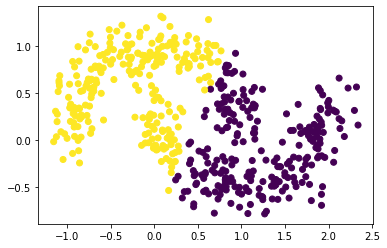

In [29]:
km = KMeans(n_clusters = 2)

km.fit(X)
y_pred = km.predict(X)
plt.scatter(X[:, 0], X[:, 1], c = y_pred)

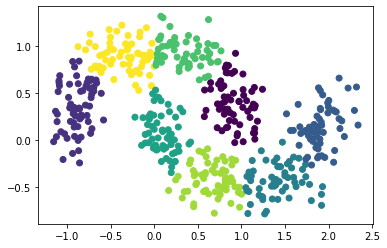

In [30]:
km = KMeans(n_clusters = 8)

km.fit(X)
y_pred = km.predict(X)
plt.scatter(X[:, 0], X[:, 1], c = y_pred)

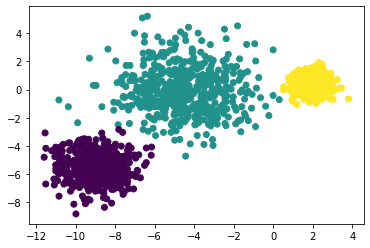

In [58]:
X, y = make_blobs(centers = 3, cluster_std=[1.0, 1.8, 0.5], n_samples=1500, random_state=170)
plt.scatter(X[:, 0], X[:, 1], c = y)

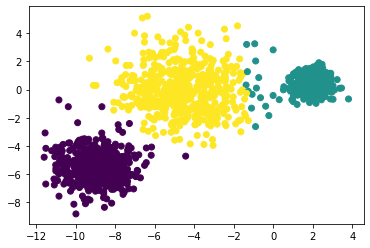

In [59]:
km = KMeans(n_clusters = 3)

km.fit(X)
y_pred = km.predict(X)
plt.scatter(X[:, 0], X[:, 1], c = y_pred)

# Project

In [60]:
import pandas as pd

In [61]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [62]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [64]:
df.drop('CustomerID', axis = 1, inplace = True)

In [65]:
df.rename(columns = {'Genre': 'Gender', 'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)':'Spending Score'}, inplace = True)
df.head()

,Gender,Age,Annual Income,Spending Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [69]:
df['Gender'] = np.where(df['Gender'] == 'Male', 0, 1)

In [70]:
df.head()

,Gender,Age,Annual Income,Spending Score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


KMeans(n_clusters=3)

In [86]:

error = []
for i in range(3, 10):
    km = KMeans(n_clusters = i)
    km.fit(df)
    # y_pred = km.predict(df)
    # df['Cluster'] = y_pred
    error.append(km.inertia_)

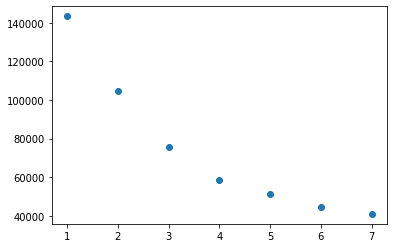

In [87]:
plt.scatter(np.arange(1, len(error)+1), error)

In [93]:
km = KMeans(n_clusters = 5)
km.fit(df)
y_pred = km.predict(df)
df['Cluster'] = y_pred
error.append(km.inertia_)

In [94]:
import plotly.express as px

px.scatter_3d(df, x = "Age", y = 'Annual Income', z = 'Spending Score', color = 'Cluster')

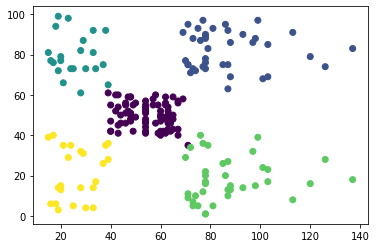

In [98]:
plt.scatter(df['Annual Income'], df['Spending Score'], c = df['Cluster'])